##### [< Forrige](5%20-%20sympy.ipynb)     |     [Neste >](7%20-%20løkker%20og%20simulering.ipynb)

<span style="color:#9bb1d4;font-size:30px;font-weight:900"> 6 - pandas, filtrering, logikk og betingelser </span>  

# Logikk og betingelser

Noe av det vi gjør oftest når vi programmerer er å teste om en betingelse er sann eller usann. Når testen er utført, kan programmet velge riktig vei å gå i fortsettelsen. Slik testing kalles "logikk". Vi har allerede i innledningen vært inne på variabeltypen som avgjør om en test er sann eller usann, typen `bool`. 

Sann eller usann (`True` og `False`) brukes som oftest sammen med en `if`-betingelse, slik som dette:

#### Eksempel 1:

In [2]:
if False:
    print("Hei")
else:
    print("Hå")

Hå


Vanligvis vil `if`-setningen inneholde en test som ikke er helt åpenbar, og som avhenger av input i en funksjon eller en variabel som er definert et annet sted i koden. Her er et eksempel på det første:

#### Eskempel 2:

In [6]:
import numpy as np

def did_I_win(s0,s1):
    if s1>s0:
        return "won!"
    else:
        return "lost" 

PricePaid=100
StockPriceToday=int(np.random.rand()*200)
print(
    f"Bought for: {PricePaid}\n"
    f"Worth today: {StockPriceToday}\n"
    f"You {did_I_win(PricePaid,StockPriceToday)}"
)

Bought for: 100
Worth today: 143
You won!


Ofte vil du ønske å sammenligne ulike datasett, for eksempel to numpy-rekker. Dersom du skal ha en `if`-betingelse, må du imidlertid huske på at for å få ett svar på en sammenligning mellom to numpy-rekker, så må du angi på hvilken måte de skal sammenlignes. I utgangspunktet vil en slik sammenligning bare gi resultatet fra en sammenligning av hvert element i de to rekkene. Resultatet av sammenligningen er altså ikke en bolsk verdi (`bool`) men en ny rekke. En slik sammenligning vil derfor føre til en feil:

#### Eksempel 2:

In [8]:
a=np.array([1,2,3])
b=np.array([3,2,1])
print(a>b)
if a>b:
    print('a was bigger than b')

[False False  True]


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

I stedet må vi angi hvordan den elementvise sammenligningen skal sammenfattes i et sant/usant-resultat. Vi kan da velge mellom å kreve at alle elementene er sanne med numpyfunksjonen `all()`, eller at minst ett av elementene er sanne med`any()`.

#### Eksempel 3:


In [9]:
if np.any(a>b):
    print('There were elements in a where the corresponding element in b was smaller')
    
    
a=np.array([101,102,103])
if np.all(a>b):
    print('All elements in a was bigger than the corresponding element in b')


There were elements in a where the corresponding element in b was smaller
All elements in a was bigger than the corresponding element in b


Ofte vil du ha bruk for å bruke flere vilkår for testen, der du enten krever at alle må være sanne, eller at det holder at én er sann, eller en kombinasjon. Det oppnår vi med `and` og `or`. 

Et annet nyttig nøkkelord for logiske tester er `in`. Dette brukes på alt fra å finne ut om et objekt er i en liste eller annen datastruktur, til om en delstreng er i en streng. Her er et eksempel som bruker alle disse nøkkelordene i `if` og `elif`-setninger:

#### Eksempel 4:

In [10]:
animal='lion'

cats=['lion','tiger','puma','lynx']
mammals=['human','bear','cat','whale','mouse']+cats

if (animal in cats) and (animal in mammals):
    print(f"{animal} is a cat and a mammal")
elif (not animal in cats) and (animal in mammals):
    print(f"{animal} is not a cat, but it is a mammal")
elif (animal in cats) and (not animal in mammals):
    print(f"{animal} is a cat, but not a mammal")   
else:
    print(f"{animal} is neither a cat nor a mammal")

lion is a cat and a mammal


Legg merke til `elif` over. De er `if`-setninger som er knyttet til `if`-setningen over. Koden til en `elif`-setning kjøres dersom hverken `if`-setningen eller noen `elif`-setninger over har blitt tilfredsstilt. 

# Eksempel med datasett

Vanligvis vil slike tester ligge inne i kode der det ikke er helt åpenbart hva variabelen du tester er. Dette er illustrert i eksemplet under, der variabelen bestemmes av innholdet i datasettet "schooling-gdp.csv". Vi starter med å hente inn datasettet og plotte BNP per capita mot Utdanning:

#### Eksempel 5:

In [16]:
!pip install matplotlib

  Using cached matplotlib-3.9.0-cp312-cp312-macosx_10_12_x86_64.whl.metadata (11 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.2/162.2 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 10.5 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 263.3/263.3 kB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 9.3 MB/s eta 0:00:00a 0:00:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 9.1 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.2/103.2 kB 5.2 MB/s eta 0:00:00


Matplotlib is building the font cache; this may take a moment.


<Axes: xlabel='BNP_per_capita', ylabel='Utdanning'>

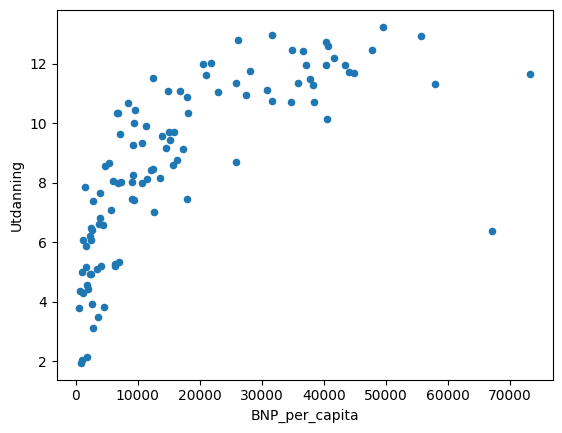

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('/Users/maaas6121/Library/CloudStorage/OneDrive-UiTOffice365/Skrivebord/Python.Lab/notebooks/data/schooling-gdp.csv') # Din vei til data.
df.plot.scatter('BNP_per_capita','Utdanning')

Vi ser at sammenhengen virker mer usikker for når utdanningsnivået og BNP per capita er høyt. Vi kan derfor bruke en `if`-setning til å kun ta med land med høyt BNP per capita eller høyt utdanningsnivå. Vi ønsker også å kun se på andre land en Norge. Da kan vi for eksempel kjøre denne koden:

#### Eksempel 6:

<Axes: xlabel='BNP_per_capita', ylabel='Utdanning'>

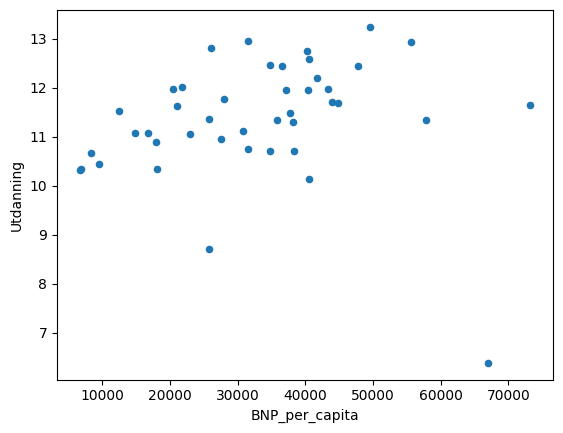

In [18]:
index_list=[]
for index, (country,code,gdp_cap,edu,pop) in df.iterrows():
    if (gdp_cap>20000 and country!='Norway') or edu>10:
        index_list.append(index)
    
df_filtered=df[df.index.isin(index_list)]
df_filtered.plot.scatter('BNP_per_capita','Utdanning')

Her lager vi en liste, og legger til indeksen til hvert element i datarammen `df` som skal inkluderes. Vi velger så ut radene i datarammen med disse indeksene med `dataframe`-funksjonen `isin()`. Funksjonens navn kommer fra *is in*, så den tester altså om index_list er i datarammen `df`. Som vi ser, ser det ut til å være er det liten sammenheng mellom BNP per capita og utdanningsnivå for disse observasjonene. 

#### Tips:
Vi kan også gjøre filtreringer direkte når vi viser dataene, men da må vi bruke "bitvis" sammenligning. Her er `and` lik `&` og `or` lik `|`

<Axes: xlabel='BNP_per_capita', ylabel='Utdanning'>

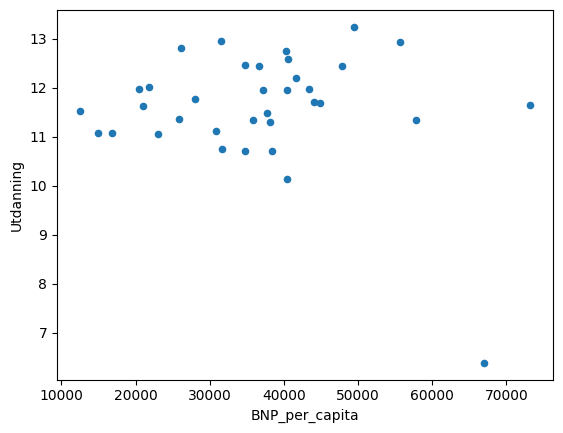

In [19]:
df[((df["Utdanning"]>11) | (df["BNP_per_capita"]>30000))].plot.scatter("BNP_per_capita", "Utdanning")

# Titlon

I eksemplet over leser Pandas dataene fra en fiil, men Pandas kan også hente data direkte fra en database på nettet. Vi skal først se hvordan vi kan hente data fra `titlon.uit.no`. Dette er en database som inneholder informasjon om aksjer, derviater og obligasjoner handlet på [Oslo Børs Euronext](https://www.euronext.com/en/markets/oslo).  

Det første vi må gjøre er å hente en pakke som kan kommunisere med serveren. Vi skal bruke pymysql. Den er i utgangspunktet ikke installert her på uit's jupyter-server, så det må vi gjøre selv. Det gjør du slik:

Åpne konsollen og skriv `pip install pymysql`

For å hente data gjør du følgende:

På [https://titlon.uit.no/](https://titlon.uit.no/) ligger det børsinformasjon fra Oslo Børs. For å hente data fra Titlon gjør du følgende:

1. gå inn på [https://titlon.uit.no/](https://titlon.uit.no/) 
2. trykk på "Python"
3. logg inn (om du får en feilmelding etter innlogging følger du bare lenken over på nytt)
4. Kopierer teksten i tekstboksen
5. lim den inn under


#### Eksempel 7:
LES INSTRUKSJONENE OVER! KODEN UNDER KAN IKKE KJØRES UTEN VIDERE.

In [12]:
!pip install pymysql

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.0/45.0 kB 2.6 MB/s eta 0:00:00


In [13]:
import pandas as pd
#you may substitute pymysql for pymssql in the following TWO sentences if you prefer the MS SQL client:
import pymysql
con = pymysql.connect(host='titlon.uit.no', 
                               user="markus.j.aase@uit.no", 
                               password="jegerstipendiatpåuit%$RZcoC8tP5", 
                               database='OSE')  
crsr=con.cursor()
crsr.execute("SELECT * FROM equity WHERE Name='Equinor' ORDER BY Date")
r=crsr.fetchall()
df=pd.DataFrame(list(r), columns=[i[0] for i in crsr.description])
df

	

OperationalError: (2003, "Can't connect to MySQL server on 'titlon.uit.no' (timed out)")

Koden leser inn dataene til en pandas `dataframe`, eller dataramme. Denne er kalt `df` her. Om vi ser nærmere på koden, så ser vi at den gjør følgende:

1. lager et objekt `con` som representerer forbindelsen med databasen. Denne lages ved å bruke `connect()`-funksjonen til `pymysql`, som er en pakke for å hente data fra MySQL-databaser. Input er navn på server, brukernavn, passord (automatisk generert) og navn på database. 

2. lager en streng `sql` med kommandoen til databasen, i SQL-språk
3. lager en `dataframe` som kalles `df` ved å bruke  `read_sql_query`-funksjonen i pandas

Før vi fortsetter er det kanskje greit å forklare hva SQL er. SQL er et språk laget spesifikt for å hente ut data fra dataabaser. Nesten alle databaser er SQL-basert. Syntaksen kan virke litt knotete, men kan være lurt å lære seg dette språket. En god SQL-spørring kan spare deg for mye programmering senere. Dette er imidlertid ikke et kurs i SQL, så vi går ikke nærmere inn på denne syntaksen her. 

I tabellen vi henter, over, mangler endel variabler fordi det ikke er plass. For å se navnet på alle variablene kan du bruke `keys()`-funksjonen til datarammen:

#### Eksempel 8:

In [ ]:
df.keys()

En dataframe ligner litt på en oppslagsliste. Du henter frem variabelen du vil bruke ved hjelp av hakeparenteser. I Titlondatabasen er avkastningen `lnDeltaP`, så la oss ta en kikk på på den:

#### Eksempel 9:

In [ ]:
df['lnDeltaP']

Det viser seg at i aksjemarkedet, så har aksjene en tendens til å bevege seg i samme retning. Går børsen først ned, så vil det gjelde de aller fleste aksjene på børsen. Gjennomsnittetlig avkastning for alle børsens aksjer måles av *børsindeksen*. I Titlon er børsindeksen lagt inn som en variabel for hvert selskap under navnet `lnDeltaOSEBX`. La oss derfor undersøke om det stemmer at det er en nær sammenheng mellom Equinors kurs og børsindeksen, ved hjelp av `matplotlib`:

#### Eksempel 10:

In [ ]:
df.plot.scatter('lnDeltaP','lnDeltaOSEBX')

Du kan finne informasjon om andre aksjer enn Equinor om du vil. Koden under kjører en SQL-spørring som henter navnene på alle selskap i databasen etter 2015. Om du vil hente ut et annet selskap, kan du velge blant disse

#### Eksempel 11:

In [ ]:
sql="SELECT distinct Name,ISIN,SecurityId,CompanyId FROM equity WHERE Year(Date)>2015 ORDER BY `Name`"
companies=pd.read_sql_query(sql, con)
list(companies.values)

### Tips og triks
På samme måte som `keys`, kan du også bruke `columns` til å finne kolonnene

#### Tips 1:

In [ ]:
companies.columns

Det kan være interessant å få en enkel oversikt over hvilke observasjoner man har i en kolonne. Da kan man bruke `unique` for å finne unike verdier, og `value_counts` for å finne hvor mange observasjoner av hver unike verdi man har.

#### Tips 2:

In [ ]:
companies["Name"].unique()
companies["Name"].value_counts()

# Lage graf med flere serier, der alle har startverdi 100

La oss se nærmere på tre av selskapene, og plott dem sammen. Vi bruker en SQL `WHERE`-betingelse til å begrense utvalget til de tre selskapene som er nevnt og til datoer etter 2000. Så tar vi også med i SQL-setningen en sortering på dato:


#### Eksempel 12:

In [ ]:
sql=("SELECT distinct Name,date, AdjustedPrice FROM equity "
    "WHERE (Name='Equinor' OR Name='Tomra Systems' OR Name='DNB') "
    "AND `Date`>'2000-01-01'"
    "ORDER BY `Date`")

Vi kan nå kjøre denne spørringen mot Titlon:


#### Eksempel 13:

In [ ]:
df=pd.read_sql_query(sql, con)
df

Når dataene ligger i "lengdeformat" slik som dette, kan vi bruke `groupby` til å samle observasjoner og finne verdier som gjennomsnitt, antall osv

#### Tips 3: 

In [ ]:
df.groupby("Name")["AdjustedPrice"].mean()

Om vi ønsker å sammenligne utviklingen kan det være en fordel å få prisene i hvert selskap i en egen kolonne. Da må vi endre vekk fra "lengdeformat". Det gjør vi slik:

#### Eksempel 14:

In [ ]:
df=df.pivot(index='date', columns='Name', values='AdjustedPrice')
df

Hvis vi ønsker å tilbakestille, kan vi bruke `melt`, som er det motsatte av `pivot`

#### Tips 4: 

In [ ]:
df1 = df.melt(ignore_index=False, value_name="AdjustedPrice").reset_index()
df1

Equinor ble imidlertid ikke børsnotert før i 2001. I alle observasjoner før børsnoteringen står det derfor `NaN`, hvilket betyr "ingen observasjon". For å kunne sammenligne må alle tre aksjene være observert på hver dato. Vi kan oppnå dette med funksjonen `dropna()`:


#### Eksempel 15:

In [ ]:
df=df.dropna()
df

Vi ser nå at de tomme cellene er borte. Equinor ble altså børsnotert 18. juni 2001.

For å kunne sammenligne selskapenes utvikling bedre, bør de starte på samme tidspunkt. For å gjøre det deler vi alle observasjonene på den første. For å dele observasjoner på noe, bruker vi `div()`-funksjonen til datarammen. Vi skal dele på første rad, som er `df.iloc[0]`. Så multipliserer vi det hele med 100:


#### Eksempel 16:

In [ ]:
df=100*df.div(df.iloc[0])
df

Vi ser nå at alle aksjene starter på 100 den datoen Equinor ble børsnotert. Hvilet selskap har vært det beste å investere i? Hvilket har vært verst? 

Vi kan nå plotte utviklingen. Når vi jobber med pandas, er det best å bruke den innebygde `plot()`-funksjonen i pakken. Da får vi automatisk riktige etiketter:

#### Eksempel 17:

In [ ]:
ax=df.plot()
ax.legend(loc='upper left',frameon=False)

Pakken `seaborn` bygger oppå `matplotlib` og gjør en del grafer lette med lite bruk av kode. Hvis vi henter frem dataene vi lagret i lengdeformat i `df1`, kan vi ta gjennomsnittet av alle selskapene (uten å justere for startverdien der vi delte på første kolonne)

#### Tips 5:

In [ ]:
import seaborn as sns
sns.lineplot(data=df1, y="AdjustedPrice", x= "date")

Ved å bestemme at vi skal filtrere på variabelen `Name`, så kan vi få et lignende plot som i Eksempel 17 ved å spesifisere `hue`
#### Tips 6:

In [ ]:
sns.lineplot(data=df1, y="AdjustedPrice", x= "date", hue="Name")

Det er enkelt å legge til nye variabler. Man gjør det på samme måten som vi gjorde med `dict`
#### Tips 7: 

In [ ]:
df1['terningkast_styreleder'] = np.random.randint(1, 7, df1.shape[0])
df1

Ikke overraskende så har ikke terningkastene noe å si på avkastningen. Her ser vi også hvordan `groupby` kan være til hjelp

In [ ]:
import matplotlib.pyplot as plt
df1.groupby("terningkast_styreleder")["AdjustedPrice"].mean().plot()
plt.ylabel("avkastning")

# Eurostat

Eurostat er en veldig nyttig kilde til data. De har et stort utvalg av data på europeiske land. De har laget en egen pakke til python som ikke overraskende heter `eurostat`. Denne pakken er heller ikke installert i utgangspunktet på jupyter.uit.no. Dere må derfor åpne "Terminal" og kjøre  `pip install eurostat` for å kjøre den. 

For å se hvilke tabeller som er der, henter vi innholdsfortegnelsen (table of contents) med funksjonen `get_toc_df`. Det gir oss en `pandas` dataramme:


#### Eksempel 18:

In [ ]:
import eurostat
toc = eurostat.get_toc_df()
toc

Du kan finne hvor mange tabeller det er med `len(toc)`, og det er i skrivende stund over ti tusen tabeller. Det blir litt krevende å lete gjennom alle, så vi ønsker derfor å begrense antall tabeller til de som er relevante. Anta at vi ønsker å se på utviklingen i BNP per innbygger for landene som er med i statistikken. Nærmere bestemt, vi ønsker å finne alle tabeller der `'GDP per capita'` er i tittelen. 

BNP per innbygger er hvor mye hver person i landet i gjennomsnitt produserer i løpet av ett år. 

Vi gjør dette ved å lage følgende "list comprehension": `['GDP per capita' in i for i in toc['title']]`. Elementene i denne listen er sant (`True`) dersom 'GDP per capita' er i tittelen, og usant (`false`) om det ikke er i tittelen. 

#### Eksempel 19:

In [ ]:
gdp_in_toc_list=['GDP per capita' in i for i in toc['title']]

Vi kan så velge de elementene hvor betingelsen er sann ved å sette listen inn i en klammeparentes etter innholdsfortegnelsen, `toc[gdp_in_toc_list]`. Kun de elementene i innholdsfortegnelsen der det står sant (`True`) i listen, tas da med.

#### Eksempel 20:

In [ ]:
#collecting only the tables where 'GDP per capita' is in the name
toc_gdp=toc[gdp_in_toc_list]
toc_gdp

La oss nå se på tabellen "Purchasing power adjusted GDP per capita", som har kode 'sdg_10_10'. Da bruker vi funksjonen `get_data_df` med tabellkoden som argument: 


#### Eksempel 21:

In [ ]:
gdp_data = eurostat.get_data_df('sdg_10_10')
gdp_data

Tabellen inneholder imidlertid endel data vi ikke ønsker å ha med. For det første ønsker vi kun å ta med tilfellene der feltet "na_item" er lik 'EXP_PPS_EU27_2020_HAB', for det andre er her dataene til hvert enkelt land ligger. Dette gjør vi på samme måte som over med listen `gdp_data['na_item']=='EXP_PPS_EU27_2020_HAB'`, som er sann når "na_item" er lik 'EXP_PPS_EU27_2020_HAB'. Setter vi inn denne listen i klammeparentes etter `gdp_data` får vi en filtrert liste:

#### Eksempel 22:

In [ ]:
gdp_data = gdp_data[gdp_data['na_item']=='EXP_PPS_EU27_2020_HAB']
gdp_data

### Tips: endring av kolonnenavn



Vi husker at man kan finne navnene på kolonner ved `keys` eller `columns`, inkl spesifikke kolonner ved bruk av slice

In [ ]:
print(gdp_data.keys())
print(gdp_data.columns)

Vi ser ovenfor at denne er definert som en index. Derfor lagrer vi kolonnenavnene vår som en liste i `col_names` 

In [ ]:
col_names = list(gdp_data.columns)


Hvis vi f.eks. ønsker å endre "unit" til "unit_new", kan vi definere på nytt, på samme måte som vi gjorde for lister i forelesning 4

In [ ]:
col_names[2] = "unit_new"
print(col_names)

For å gjøre disse endringene i datasettet vårt, kan vi definere kolonnene våre i datasettet til col_names

In [ ]:
gdp_data.columns= col_names
gdp_data.head()

En annen metode er å bruke funksjonen `rename` sammen med oppslag

In [ ]:
gdp_data.rename(columns={"unit_new":"unit_new_v2"}, inplace=True)
gdp_data.head()

### Tilbake til eksemplene...

Videre ønsker vi å fjerne de definisjonene av EU vi ikke trenger, som er 'EA18','EA19','EU27_2007','EU27_2020','EA18' og 'EA18'. Vi bruker samme teknikk, vi lager en liste som inneholder `True` og `False`, avhengig om en betingelse er oppfylt. 

Feltet vi nå skal filtrere ut fra er "geo\\time", som innholder landkodene. Siden vi ikke bare skal sjekke om én streng er i denne kolonnen, men om flere mulige kandidater er det, kan vi ikke bruke "list comprehension" som over. Vi bruker i stedet en pandas-funksjon `isin` (*is in*), som tar en liste med "ting" vi ikke vil ha i feltet som argument.

<b> NB!: </b> Hvis dere har et annet variabelnavn enn 'geo\\time', kan dere bytte ut det under, eller lage nytt variabelnavn (jamf tipsene ovenfor)

#### Eksempel 23:

In [ ]:
unwanted=gdp_data['geo\\time'].isin(['EA18','EA19','EU27_2007','EU27_2020','EA18','EA18'])


Men vi vil ikke ha `unwanted`, så vi tar kun med tilfellene der `unwanted==False`

#### Eksempel 24:

In [ ]:
gdp_data = gdp_data[unwanted==False]

Angela Merkel akkurat er gått av. Vi ønsker derfor å se på utviklingen i BNP justert for kjøpekraft siden Merkel tiltrådte i 2005. 

Vi ønsker derfor å velge ut kolonnene 2005 til 2020, i tillegg til kolonnen 'geo\\time' med landkodene, som skal stå først. Vi gjør det ved å lage en liste med de kolonnene vi ønsker å hente ut fra `gdp_data`. Vi lager da to lister som vi slår sammen:

Liste 1: Vi starter med navnet til første kolonne 'geo\\time', som vi lager om til en liste med ett element ved hjelp av klammeparenteser: `['geo\\time']`. 

Liste 2: Vi bruker så den innebygde `range()` til å generere fra 2005 til 2020, og konverterer resultatet til en liste: `list(range(2005,2021)`. 

Summen av disse to listene blir da en liste med 'geo\\time' først og så årstallene.

<b> NB!: </b> hvis koden under ikke fungerer, se på kommentaren rett over "eksempel 23"

#### Eksempel 25:

In [ ]:
chosen_columns=['geo\\time']+list(range(2005,2021))

Vi kan nå velge ut kun disse kolonnene ved å velge samtlige rader fra gdp_data.loc, og kolonnene angitt av listen:

#### Eksempel 26:

In [ ]:
gdp_data=gdp_data.loc[:,chosen_columns]
gdp_data

Så ønsker vi videre å kategorisere observasjonene ut fra landkode, og ikke rekkefølge. Vi setter derfor 'geo\\time' som indeks:

#### Eksempel 27:

In [ ]:
gdp_data=gdp_data.set_index('geo\\time')
gdp_data

Vi skal nå "rebasere" tallene slik  at alle starter på 100. Vi må først sørge for at hvert årstall er en observasjon/rad, og ikke en kolonne. Vi gjør det med pandasfunksjonen `transpose()`. Den bytter om på rader og kolonner:

#### Eksempel 28:

In [ ]:
gdp_data=gdp_data.transpose()
gdp_data

Vi kan nå "rebasere". Vi gjør det ved å bruke pandasfunksjonen `div()`, som deler alle observasjonene på argumentet. Vi ønsker å dele på første rad (år 2005), som er `gdp_data.iloc[0]`:

#### Eksempel 29:

In [ ]:
gdp_data=gdp_data.div(gdp_data.iloc[0])
gdp_data

Vi kan nå plotte resultatet med `plot()`-funksjonen i pandas. Vi velger gjennomsiktighet 0.3 og figurstørrelse 20x10. Etikettene plasseres øverst til venstre, uten ramme og i fire kolonner:

#### Eksempel 30:

In [ ]:
ax=gdp_data.plot(alpha=0.3,figsize=(20, 10))
ax.legend(loc='upper left',frameon=False,ncol=4)

Som nevnt har vi valgt perioden fra 2005 fordi Angela Merkel tiltrådte da. Det kan derfor være en god idé å utheve Tysklands kurve. Vi skal gjøre det ved å øke linjevidden til 5 og ta bort gjennomsiktighet (alpha=1). For at det skal være enkelt å også utheve andre land, lager vi en funksjon som uthever land med et bestemt symbol. `ax` representerer grafen, og må også være et argument, slik at funksjonen kan operere på den. Her er funksjonen:

#### Eksempel 31:

In [ ]:
def thick_line(symbol,ax):
    labels=[i._label for i in ax.lines]  #makes a list of symbols in the order of lines in the axis object
    i=labels.index(symbol)               #identifies at which position symbol is located
    ax.lines[i].set_linewidth(5)         #sets the line with of the line at position i to 5 
    ax.lines[i].set_alpha(1)             #removes transparancy of the line at position i to 5 

Funksjonen gjør følgende:
1. Lager en liste med symbolene til linjene
2. identifiserer hvor i listen `symbol` befinner seg
3. setter linjevidden til denne linjen til 5
4. Fjerner gjennomsiktigheten til denne linjen

Vi kan nå plotte grafen, etter å ha uthevet linjene til 'DE' (Tyskland) 'NO' (Norge) og 'EU28' (EU inkludert Storbritannia):

#### Eksempel 32:

In [ ]:

thick_line('DE',ax)
thick_line('NO',ax)
thick_line('EU28',ax)
ax.legend(loc='upper left',frameon=False,ncol=4)
ax.figure

## Oppgaver:

1. Hent ut to andre selskap fra titlon, og plott dem med `scatter()`-funksjonen for å se om det er en sammenheng mellom avkastningene.  

2. Én av `elif`-setningene i Eksempel 4 vil aldri bli tilfredsstilt, uansett hva du setter som `animal`. Hvorfor?

3. I eksempel 6, hva skjer om du fjerner `or edu>10` fra koden? Forklar.

4. Hent data for et annet selskap (valgfritt) fra titlon.uit.no, og velg to andre variabler enn i Eksempel 17, og plott dem mot hverandre.

5. Hent en tabell om strømpris i eurostat, og lag en tilsvarende graf som i Eksempel 32 for den. Gjør slik:
    1. Sjekk hvilke tabeller som er tilgjengelig med `toc[['Electricity' in i for i in toc['title']]]` og finn koden i feltet 'code' til tabellen "7328	Electricity prices for non-household consumers...". 
    2. Hent tabellen som har denne koden
    3. Gjør følgende filtrering:
    ```
    df=df[(df['tax']=='X_TAX')*
   (df['consom']=='4162906')*
   (df['currency']=='EUR')*
   (df!=0).all(axis=1)]
    ```
    4. Lag graf som i Eksempel 32. Velg selv hvilke land dy synes er viktige å utheve. 

##### [< Forrige](5%20-%20sympy.ipynb)     |     [Neste >](7%20-%20løkker%20og%20simulering.ipynb)